<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/Smartwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("Fitness_trackers.csv")
pd.set_option("display.max_rows", None)
df.tail()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
560,Huawei,Smartwatch,Watch 36456,Black,"55,000","55,000",AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,"13,990","20,990",AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,"1,999","1,999",OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,"3,499","3,499",OLED Display,3.7,Thermoplastic polyurethane,7,NaN
564,FOSSIL,Smartwatch,Gen 5E,"Grey, Multicolor","18,495","18,495",AMOLED Display,4.2,Stainless Steel,1,NaN


*  Verficando os tipos primitivos das colunas e se existem valores **nulos**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    object 
 5   Original Price                  565 non-null    object 
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               514 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
 10  Reviews                         78 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.7+ KB


* Precisamos alterar os tipos primitivos das colunas **Selling Price** e **Original Price** para *float*.

In [5]:
df["Original Price"] = df["Original Price"].apply(lambda x: x.replace(",", "."))
df["Original Price"] = df["Original Price"].str.replace(".", "").astype(float)

<ipython-input-5-7cc3a94ebcdc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Original Price"] = df["Original Price"].str.replace(".", "").astype(float)


In [6]:
df["Selling Price"] = df["Selling Price"].apply(lambda x: x.replace(",", "."))
df["Selling Price"] = df["Selling Price"].str.replace(".", "").astype(float)

<ipython-input-6-7bd6f7fce4b9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Selling Price"] = df["Selling Price"].str.replace(".", "").astype(float)


In [8]:
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499.0,2999.0,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099.0,2499.0,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722.0,2099.0,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469.0,2999.0,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799.0,2199.0,OLED Display,4.3,Plastic,7,NaN


# **Question 1: Qual foi o produto mais vendido ?** 

* Vamos agrupar todos os produtos por **marca** usando o método **groupby**

In [9]:
brand = df.groupby("Brand Name").count()

In [72]:
brand["Model Name"].sort_values()

Brand Name
LAVA          1
Infinix       1
Oppo          2
Noise         2
LCARE         2
OnePlus       3
boAt          4
GOQii         4
Fastrack      6
Xiaomi       10
realme       12
Noise        17
Honor        20
Huawei       26
huami        36
SAMSUNG      48
FitBit       51
APPLE        86
GARMIN      101
FOSSIL      133
Name: Model Name, dtype: int64

# Sabemos que o **top 3** das marcas mais vendidas foram:
* FOSSIL
* Garmin
* Apple

* ## No entanto ainda precisamos identificar qual foi de fato o produto mais vendido da marca **Fossil**.

In [11]:
# Não estava conseguindo retornar as linhas da coluna "Brand Name" fosse iguais à
# FOSSIL, então decidi remover possiveis espaços em branco que pudessem estar no nome

df["Brand Name"] = df["Brand Name"].apply(lambda x: x.replace(" ", ""))
best_seller = df.loc[df["Brand Name"] == "FOSSIL"]

* Criei um agrupamento dos modelos vendidos para que pudesse verificar a quantidade vendida de cada produto

In [12]:
best_seller = best_seller.groupby("Model Name").count()
best_seller["Device Type"].head()

Model Name
4th Gen Explorist HR    1
4th Gen Venture HR      3
5th Gen Julianna        1
Barstow Hybrid          1
Cameron Hybrid          1
Name: Device Type, dtype: int64

* Filtrando qual foi o **produto mais vendido**.

In [13]:
best_seller["Brand Name"].max()

6

* Localizando qual foi o produto que corresponda ao valor 6.


In [14]:
best_seller.loc[best_seller["Brand Name"] == 6]

,Brand Name,Device Type,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
Model Name,,,,,,,,,,
Gen 5 Julianna HR,6,6,6,6,6,6,6,6,6,0


# O Produto mais vendido foi **Gen 5 Julianna HR** da marca **FOSSIL** com 6 unidades vendidas.

* Definindo o eixo **y** e o eixo **x** para plotar no gráfico.

In [15]:
y = brand.sort_values("Selling Price")
x = brand.sort_values("Selling Price")

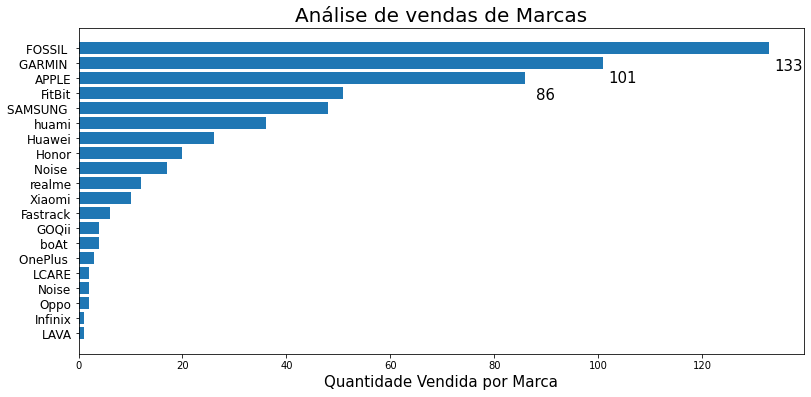

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
plt.title("Análise de vendas de Marcas", size=20)
plt.barh(y.index, x["Selling Price"])
plt.text(134, 17.5, r'133', fontsize=15)
plt.text(102, 16.7, r'101', fontsize=15)
plt.text(88, 15.6, r"86", fontsize=15)
plt.xlabel("Quantidade Vendida por Marca", size=15)
plt.yticks(size=12)
plt.show()

# **Conslusão:**
* # O produto **5 Gen Julianna HR** foi o produto mais vendido, mas será que ele foi também o **mais bem avaliado?**

# **Question 2: Qual foi o produto mais bem avaliado?**

* Criando um filtro com os maiores valores da coluna **Rating (Out of 5)**.

In [17]:
df["Rating (Out of 5)"].max()

5.0

In [24]:
rating_5 = df.loc[df["Rating (Out of 5)"] == 5.0]
rating_5["Device Type"].count()

9

* Tivemos **9** produtos com **avaliação máxima**, vamos verifiar se existe algum produto que foi avaliado duas ou mais vezes por clientes.

In [27]:
rating_5["Model Name"].value_counts()

Neutra Hybrid                        2
Galaxy Classic 4 LTE                 1
FTW1159 Hybrid                       1
Series 7 GPS 45 mm                   1
Series 7 GPS 41 mm Aluminium Case    1
Instinct                             1
Forerunner 745 Black                 1
vivoactive 4S 40mm                   1
Name: Model Name, dtype: int64

In [28]:
rating_5.loc[rating_5["Model Name"] == "Neutra Hybrid"]

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
241,FOSSIL,Smartwatch,Neutra Hybrid,Silver,13495.0,13495.0,AMOLED Display,5.0,Stainless Steel,12,NaN
252,FOSSIL,Smartwatch,Neutra Hybrid,"Brown, Black",11995.0,11995.0,AMOLED Display,5.0,Leather,12,NaN


* Definindo os valores de **x** e **y** para plotar no gráfico.

In [32]:
y = rating_5.groupby("Model Name").count()
x = y["Device Type"]
y = y.index

* Organizando os valores de **x** e **y** para que sejam exibidos no gráfico em ordem decrescente.

In [48]:
data = list(zip(x, y))
data.sort()

x, y = zip(*data)

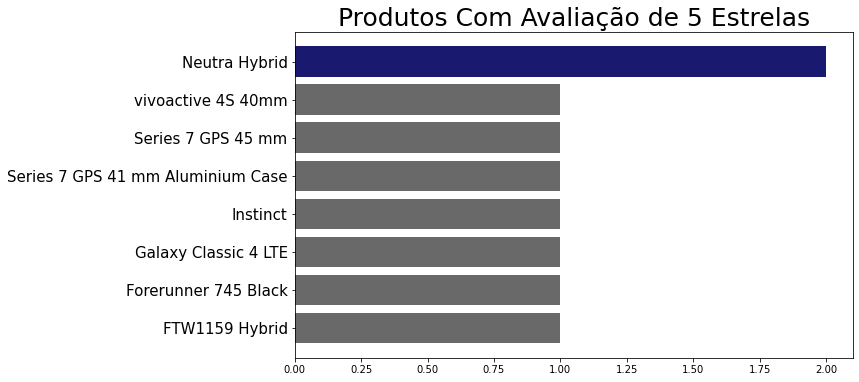

In [73]:
max_value = max(enumerate(x), key=lambda x: x[1])[0]
colors = ["#191970" if i == max_value else "#696969" for i in range(len(y))]

plt.figure(figsize=(10, 6))
plt.title("Produtos Com Avaliação de 5 Estrelas", size=25)
plt.barh(y, x, color=colors)
plt.yticks(size=15)
plt.show()

# **Conclusão:**
* ## Chegamos a conclusão que o produto **mais bem avaliado** com a nota 5 *(entre 0 e 5)* foi **Neutra Hybrid** da marca **FOSSIL**, o mesmo com **duas** unidades avaliadas com **nota máxima** .

* ## O produto mais vendido não foi o mais bem avaliado, entretanto a marca **FOSSIL** foi **a marca mais vendida e também a marca mais bem avaliada**.

# **Question 3: Qual a cor favorita dos clientes?**

In [78]:
df["Color"] = df["Color"].apply(lambda x: x.replace(" ", ""))
favorite_color = df.groupby("Color").count()
favorite_color.head()

,Brand Name,Device Type,Model Name,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
Color,,,,,,,,,,
Beige,5,5,5,5,5,5,5,5,5,2
Black,201,201,201,201,201,201,182,201,201,34
"Black,Beige",1,1,1,1,1,1,1,1,1,0
"Black,Blue",4,4,4,4,4,4,4,4,4,0
"Black,Blue,Pink",3,3,3,3,3,3,3,3,3,0


In [87]:
favorite_color["Brand Name"].max()

201

In [90]:
favorite_color = favorite_color["Brand Name"].sort_values()

In [112]:
top_10 = favorite_color[124::]
top_10

Color
DeepNavy      7
Purple        9
Red          10
Brown        13
Gold         20
White        22
Silver       25
Grey         26
Blue         34
Black       201
Name: Brand Name, dtype: int64

In [113]:
y = top_10.index
x = top_10

In [114]:
data = list(zip(x, y))

data.sort()

x, y = zip(*data)

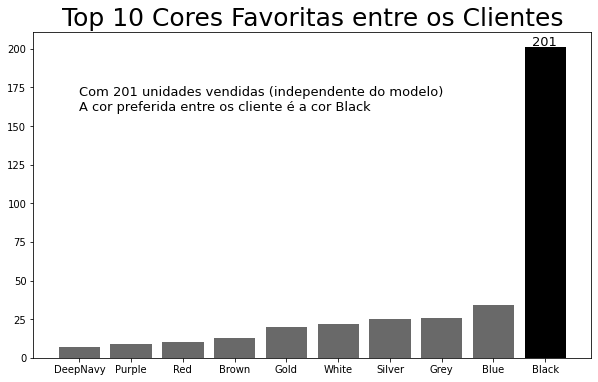

In [149]:
max_value = max(enumerate(x), key=lambda x: x[1])[0]
colors = ["#000000" if i == max_value else "#696969" for i in range(len(x))]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Cores Favoritas entre os Clientes", size=(25))
plt.bar(y, x, color=colors)
plt.text(0, 160, "Com 201 unidades vendidas (independente do modelo)\n" +
         "A cor preferida entre os cliente é a cor Black", size=13)
plt.text(8.75, 202, x[-1], size=13)
plt.show()